# CMSC320 Final Tutorial
By Esra Mahgoub

## Introduction

## Tools Used
The tools used in this notebook are
- Requests
- Pandas
- Numpy
- Mathplotlib

## Data Collection

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
from matplotlib import pyplot, dates, figure
from datetime import datetime

In [110]:
# The cumulative number of positive COVID-19 cases among Maryland residents within a single Maryland jurisdiction
cases = pd.read_csv('MD_COVID-19_-_Cases_by_County.csv')
cases = cases.fillna(0) # need to fill NaN with 0 to show that 0 new cases were discovered
cases

,OBJECTID,DATE,Allegany,Anne_Arundel,Baltimore,Baltimore_City,Calvert,Caroline,Carroll,Cecil,...,Montgomery,Prince_Georges,Queen_Annes,Somerset,St_Marys,Talbot,Washington,Wicomico,Worcester,Unknown
0,1,03/15/2020 10:00:00 AM,0.0,2,3,1,0.0,0.0,1,0.0,...,12,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,03/16/2020 10:00:00 AM,0.0,1,4,1,0.0,0.0,1,0.0,...,10,15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,03/17/2020 10:00:00 AM,0.0,3,6,1,0.0,0.0,1,0.0,...,24,14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,03/18/2020 10:00:00 AM,0.0,4,10,4,0.0,0.0,1,0.0,...,31,20,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,03/19/2020 10:00:00 AM,0.0,5,12,8,1.0,0.0,2,0.0,...,33,23,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,626,11/30/2021 09:00:00 AM,10526.0,55481,80262,64328,5991.0,3499.0,12797,9486.0,...,85310,102081,4205.0,3448.0,10411.0,3117.0,21506.0,11672.0,5241.0,0.0
626,627,12/01/2021 09:00:00 AM,10561.0,55599,80427,64391,6002.0,3508.0,12825,9534.0,...,85430,102189,4211.0,3450.0,10424.0,3130.0,21650.0,11698.0,5247.0,0.0
627,628,12/02/2021 09:00:00 AM,10624.0,55782,80665,64548,6026.0,3536.0,12882,9567.0,...,85615,102358,4232.0,3454.0,10469.0,3147.0,21796.0,11726.0,5268.0,0.0
628,629,12/03/2021 09:00:00 AM,10670.0,55938,80864,64760,6058.0,3579.0,12934,9598.0,...,85811,102496,4257.0,3465.0,10485.0,3172.0,21925.0,11781.0,5286.0,0.0


In [111]:
hosp = pd.read_csv('MD_COVID-19_-_Total_Hospitalizations.csv')
hosp.head()

,OBJECTID,DATE,Count
0,1,03/13/2020 10:00:00 AM,2.0
1,2,03/14/2020 10:00:00 AM,3.0
2,3,03/15/2020 10:00:00 AM,NaN
3,4,03/16/2020 10:00:00 AM,4.0
4,5,03/17/2020 10:00:00 AM,NaN


In [112]:
# The cumulative number of COVID-19 vaccinations within a single Maryland jurisdiction. Description
vacc = pd.read_csv('MD_COVID-19_-_Vaccinations_by_County.csv')
vacc

,VACCINATION_DATE,County,FirstDoseDaily,FirstDoseCumulative,SecondDoseDaily,SecondDoseCumulative,SingleDoseDaily,SingleDoseCumulative,AtLeastOneDose,AtLeastOneDoseCumulative,FullyVaccinated,FullyVaccinatedCumulative
0,12/14/2020 10:00:00 AM,Anne Arundel,2.0,2,NaN,0,NaN,0,NaN,2,NaN,0
1,12/15/2020 10:00:00 AM,Anne Arundel,4.0,6,NaN,0,NaN,0,NaN,6,NaN,0
2,12/16/2020 10:00:00 AM,Anne Arundel,56.0,62,NaN,0,NaN,0,NaN,62,NaN,0
3,12/17/2020 10:00:00 AM,Anne Arundel,106.0,168,NaN,0,NaN,0,NaN,168,NaN,0
4,12/18/2020 10:00:00 AM,Anne Arundel,180.0,348,1.0,1,NaN,0,NaN,348,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9214,12/07/2021 10:00:00 AM,Worcester,33.0,33640,35.0,30363,4.0,2796,37.0,36436,39.0,33159
9215,12/08/2021 10:00:00 AM,Worcester,36.0,33676,25.0,30388,3.0,2799,39.0,36475,28.0,33187
9216,12/09/2021 10:00:00 AM,Worcester,32.0,33708,85.0,30473,2.0,2801,34.0,36509,87.0,33274
9217,12/10/2021 10:00:00 AM,Worcester,21.0,33729,28.0,30501,1.0,2802,22.0,36531,29.0,33303


## Data Processing

In [113]:
counties = ['Allegany', 'Anne_Arundel', 'Baltimore', 'Baltimore_City', 'Calvert', 'Caroline', 'Carroll', 'Cecil', 'Charles', 'Dorchester', 'Frederick', 'Garrett', 'Harford', 'Howard', 'Kent', 'Montgomery', 'Prince_Georges', 'Queen_Annes', 'Somerset', 'St_Marys', 'Talbot', 'Washington', 'Wicomico', 'Worcester']

In [114]:
# Remove unwanted columns to clean up data
cases = cases.drop(columns=['OBJECTID'])
hosp = hosp.drop(columns=['OBJECTID'])
vacc = vacc.drop(columns=['FirstDoseDaily', 'SecondDoseDaily', 'SingleDoseDaily', 'AtLeastOneDose'])

In [115]:
# Compare county cases to vaccinations after 12/14/2020
# Compare state hospitalizations to deaths
# Show state summary of total cases each month, linear regression line


#filtered_df = df.loc[(df['date'] >= '2020-09-01')
                    # & (df['date'] < '2020-09-15')]


# Only get summarized data for each month for cases  
row1 = cases.loc[cases['DATE'].astype(str).str.contains('30')].copy()
row2 = cases.loc[cases['DATE'].astype(str).str.contains('12/04/2021')].copy()
row3 = cases.loc[cases['DATE'].astype(str).str.contains('02/28')].copy()
row = row1.append(row2)
row = row.append(row3)
row

# Sort DataFrame by date
row['DATE'] = pd.to_datetime(row['DATE'], format='%m/%d/%Y %H:%M:%S AM')
row.sort_values(by='DATE', inplace=True)

# Change date format to mm-yyyy
row['year'] = pd.DatetimeIndex(row['DATE']).year.astype(str)
row['month'] = pd.DatetimeIndex(row['DATE']).month.astype(str)
row['DATE'] = row[['month', 'year']].agg('-'.join, axis=1).astype(str)

# Drop unneeded columns
row = row.set_index('DATE')
row = row.drop(columns=['Unknown', 'year', 'month'])
row

,Allegany,Anne_Arundel,Baltimore,Baltimore_City,Calvert,Caroline,Carroll,Cecil,Charles,Dorchester,...,Kent,Montgomery,Prince_Georges,Queen_Annes,Somerset,St_Marys,Talbot,Washington,Wicomico,Worcester
DATE,,,,,,,,,,,,,,,,,,,,,
3-2020,0.0,110,186,152,12.0,4.0,82,13.0,33,0.0,...,3.0,341,294,4.0,1.0,9.0,4.0,7.0,6.0,3.0
4-2020,118.0,1725,2831,2068,150.0,71.0,436,167.0,564,51.0,...,79.0,4300,6043,52.0,26.0,150.0,35.0,206.0,406.0,61.0
5-2020,177.0,3743,5955,5564,334.0,253.0,880,366.0,1085,141.0,...,170.0,11251,15022,159.0,73.0,471.0,96.0,456.0,943.0,210.0
6-2020,205.0,5109,7985,7546,414.0,319.0,1117,479.0,1393,188.0,...,198.0,14737,18572,230.0,87.0,637.0,137.0,698.0,1067.0,286.0
7-2020,264.0,6684,11615,11004,565.0,418.0,1435,619.0,1819,326.0,...,229.0,17397,22183,378.0,117.0,874.0,330.0,936.0,1269.0,518.0
8-2020,391.0,8300,15382,14424,786.0,504.0,1686,782.0,2382,458.0,...,263.0,19946,26151,543.0,192.0,1108.0,472.0,1308.0,1547.0,800.0
9-2020,474.0,10117,17994,15629,972.0,657.0,1965,1085.0,2798,594.0,...,305.0,22584,29494,666.0,277.0,1310.0,568.0,1827.0,2009.0,1058.0
10-2020,735.0,12115,20867,17850,1195.0,753.0,2278,1365.0,3208,808.0,...,343.0,25831,32937,798.0,435.0,1501.0,655.0,2327.0,2539.0,1222.0
11-2020,3168.0,16742,29315,24521,1598.0,972.0,3327,2109.0,4391,1011.0,...,448.0,33400,41297,1097.0,918.0,2153.0,819.0,4281.0,3440.0,1483.0


In [142]:
# We want to get the number of new cases each month instead of just the cumulative count
case_diff = pd.DataFrame()
for x in counties:
    case_diff[x] = row[x].diff()
    case_diff[x][0] = row[x][0]
case_diff

,Allegany,Anne_Arundel,Baltimore,Baltimore_City,Calvert,Caroline,Carroll,Cecil,Charles,Dorchester,...,Kent,Montgomery,Prince_Georges,Queen_Annes,Somerset,St_Marys,Talbot,Washington,Wicomico,Worcester
DATE,,,,,,,,,,,,,,,,,,,,,
3-2020,0.0,110.0,186.0,152.0,12.0,4.0,82.0,13.0,33.0,0.0,...,3.0,341.0,294.0,4.0,1.0,9.0,4.0,7.0,6.0,3.0
4-2020,118.0,1615.0,2645.0,1916.0,138.0,67.0,354.0,154.0,531.0,51.0,...,76.0,3959.0,5749.0,48.0,25.0,141.0,31.0,199.0,400.0,58.0
5-2020,59.0,2018.0,3124.0,3496.0,184.0,182.0,444.0,199.0,521.0,90.0,...,91.0,6951.0,8979.0,107.0,47.0,321.0,61.0,250.0,537.0,149.0
6-2020,28.0,1366.0,2030.0,1982.0,80.0,66.0,237.0,113.0,308.0,47.0,...,28.0,3486.0,3550.0,71.0,14.0,166.0,41.0,242.0,124.0,76.0
7-2020,59.0,1575.0,3630.0,3458.0,151.0,99.0,318.0,140.0,426.0,138.0,...,31.0,2660.0,3611.0,148.0,30.0,237.0,193.0,238.0,202.0,232.0
8-2020,127.0,1616.0,3767.0,3420.0,221.0,86.0,251.0,163.0,563.0,132.0,...,34.0,2549.0,3968.0,165.0,75.0,234.0,142.0,372.0,278.0,282.0
9-2020,83.0,1817.0,2612.0,1205.0,186.0,153.0,279.0,303.0,416.0,136.0,...,42.0,2638.0,3343.0,123.0,85.0,202.0,96.0,519.0,462.0,258.0
10-2020,261.0,1998.0,2873.0,2221.0,223.0,96.0,313.0,280.0,410.0,214.0,...,38.0,3247.0,3443.0,132.0,158.0,191.0,87.0,500.0,530.0,164.0
11-2020,2433.0,4627.0,8448.0,6671.0,403.0,219.0,1049.0,744.0,1183.0,203.0,...,105.0,7569.0,8360.0,299.0,483.0,652.0,164.0,1954.0,901.0,261.0


In [116]:
# Only get summarized data for each month for hospitalizations in the state of Maryland
h1 = hosp.loc[hosp['DATE'].astype(str).str.contains('30')].copy()
h2 = hosp.loc[hosp['DATE'].astype(str).str.contains('12/04/2021')].copy()
h3 = hosp.loc[hosp['DATE'].astype(str).str.contains('02/28')].copy()
hsp = h1.append(h2)
hsp = hsp.append(h3)

# Sort DataFrame by date
hsp['DATE'] = pd.to_datetime(hsp['DATE'], format='%m/%d/%Y %H:%M:%S AM')
hsp.sort_values(by='DATE', inplace=True)

# # Change date format to mm-yyyy
hsp['year'] = pd.DatetimeIndex(hsp['DATE']).year.astype(str)
hsp['month'] = pd.DatetimeIndex(hsp['DATE']).month.astype(str)
hsp['DATE'] = hsp[['month', 'year']].agg('-'.join, axis=1).astype(str)

# Drop unneeded columns
hsp = hsp.set_index('DATE')
hsp = hsp.drop(columns=['year', 'month'])
hsp

# maybe add a difference column to show how many new hosps were added each month?

,Count
DATE,
3-2020,353.0
4-2020,4559.0
5-2020,8619.0
6-2020,10844.0
7-2020,12500.0
8-2020,14255.0
9-2020,15530.0
10-2020,17023.0
11-2020,21051.0


In [117]:
# calculate the new increase rate of hospitalizations for each month
hsp['increase'] = hsp.diff()
hsp

,Count,increase
DATE,,
3-2020,353.0,NaN
4-2020,4559.0,4206.0
5-2020,8619.0,4060.0
6-2020,10844.0,2225.0
7-2020,12500.0,1656.0
8-2020,14255.0,1755.0
9-2020,15530.0,1275.0
10-2020,17023.0,1493.0
11-2020,21051.0,4028.0


In [118]:
cnts = ['Allegany', 'Anne Arundel', 'Baltimore', 'Baltimore City', 'Calvert', 'Caroline', 'Carroll', 'Cecil', 'Charles', 'Dorchester', 'Frederick', 'Garrett', 'Harford', 'Howard', 'Kent', 'Montgomery', 'Prince George\'s', 'Queen Anne\'s', 'Somerset', 'St. Mary\'s', 'Talbot', 'Washington', 'Wicomico', 'Worcester']

res = pd.DataFrame()
for x in cnts:
    df = vacc[vacc['County'] == x]
    
    # Only get summarized data for each month for each county  
    d1 = df.loc[df['VACCINATION_DATE'].astype(str).str.contains('30')].copy()
    d2 = df.loc[df['VACCINATION_DATE'].astype(str).str.contains('12/04/2021')].copy()
    d3 = df.loc[df['VACCINATION_DATE'].astype(str).str.contains('02/28')].copy()
    
    vc = d1.append(d2)
    vc = vc.append(d3)
    
    
    # Sort DataFrame by date
    vc['VACCINATION_DATE'] = pd.to_datetime(vc['VACCINATION_DATE'], format='%m/%d/%Y %H:%M:%S AM')
    vc.sort_values(by='VACCINATION_DATE', inplace=True)


    # Change date format to mm-yyyy
    vc['year'] = pd.DatetimeIndex(vc['VACCINATION_DATE']).year.astype(str)
    vc['month'] = pd.DatetimeIndex(vc['VACCINATION_DATE']).month.astype(str)
    vc['VACCINATION_DATE'] = vc[['month', 'year']].agg('-'.join, axis=1).astype(str)

    # Drop unneeded columns
#    vc = vc.set_index('VACCINATION_DATE')
    vc = vc.drop(columns=['year', 'month'])
    
    res = res.append(vc)

res


,VACCINATION_DATE,County,FirstDoseCumulative,SecondDoseCumulative,SingleDoseCumulative,AtLeastOneDoseCumulative,FullyVaccinated,FullyVaccinatedCumulative
398,12-2020,Allegany,909,1,0,909,NaN,1
484,1-2021,Allegany,8144,1249,0,8144,NaN,1249
569,2-2021,Allegany,11242,8068,0,11242,NaN,8068
655,3-2021,Allegany,18242,11126,647,18889,136.0,11773
686,4-2021,Allegany,23823,19517,2123,25946,769.0,21640
...,...,...,...,...,...,...,...,...
9115,8-2021,Worcester,30460,27636,2536,32996,66.0,30172
9146,9-2021,Worcester,31446,28943,2639,34085,41.0,31582
9176,10-2021,Worcester,32185,29606,2685,34870,NaN,32291
9207,11-2021,Worcester,33359,30125,2779,36138,26.0,32904


## EXPLORATORY ANALYSIS AND DATA VISUALIZATION

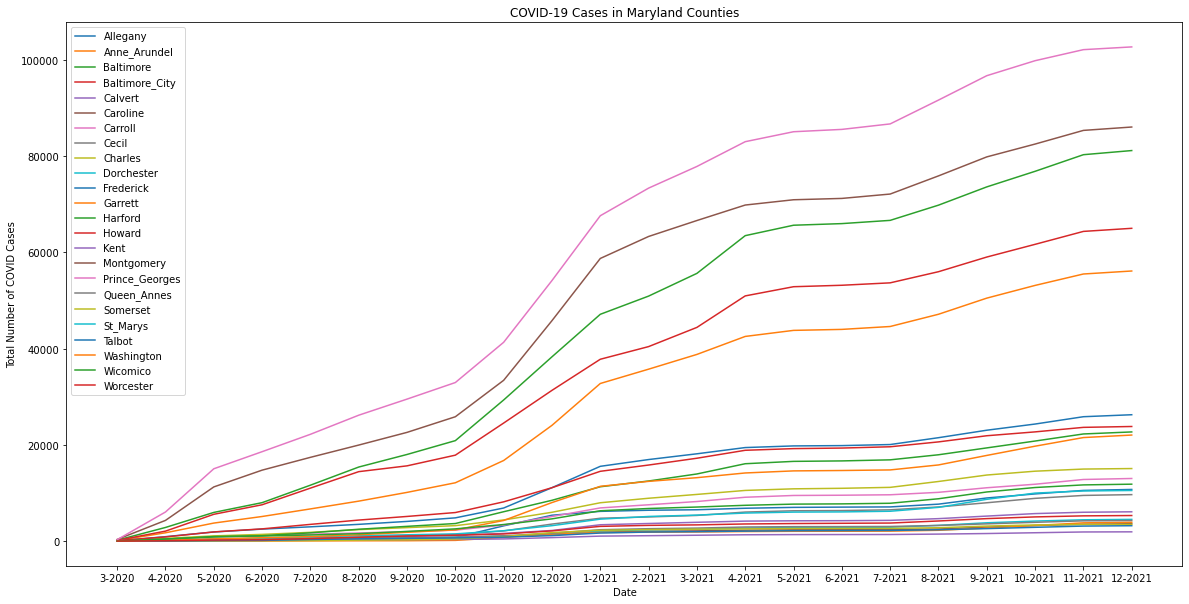

In [119]:
plt.figure(figsize=(20,10))

for x in counties:
    plt.plot(row.index, row[x], label=x)
    plt.title("COVID-19 Cases in Maryland Counties")
    plt.xlabel("Date")
    plt.ylabel("Total Number of COVID Cases")
plt.legend()


<AxesSubplot:title={'center':'COVID Vaccinations per Maryland County'}, xlabel='County', ylabel='FullyVaccinated'>

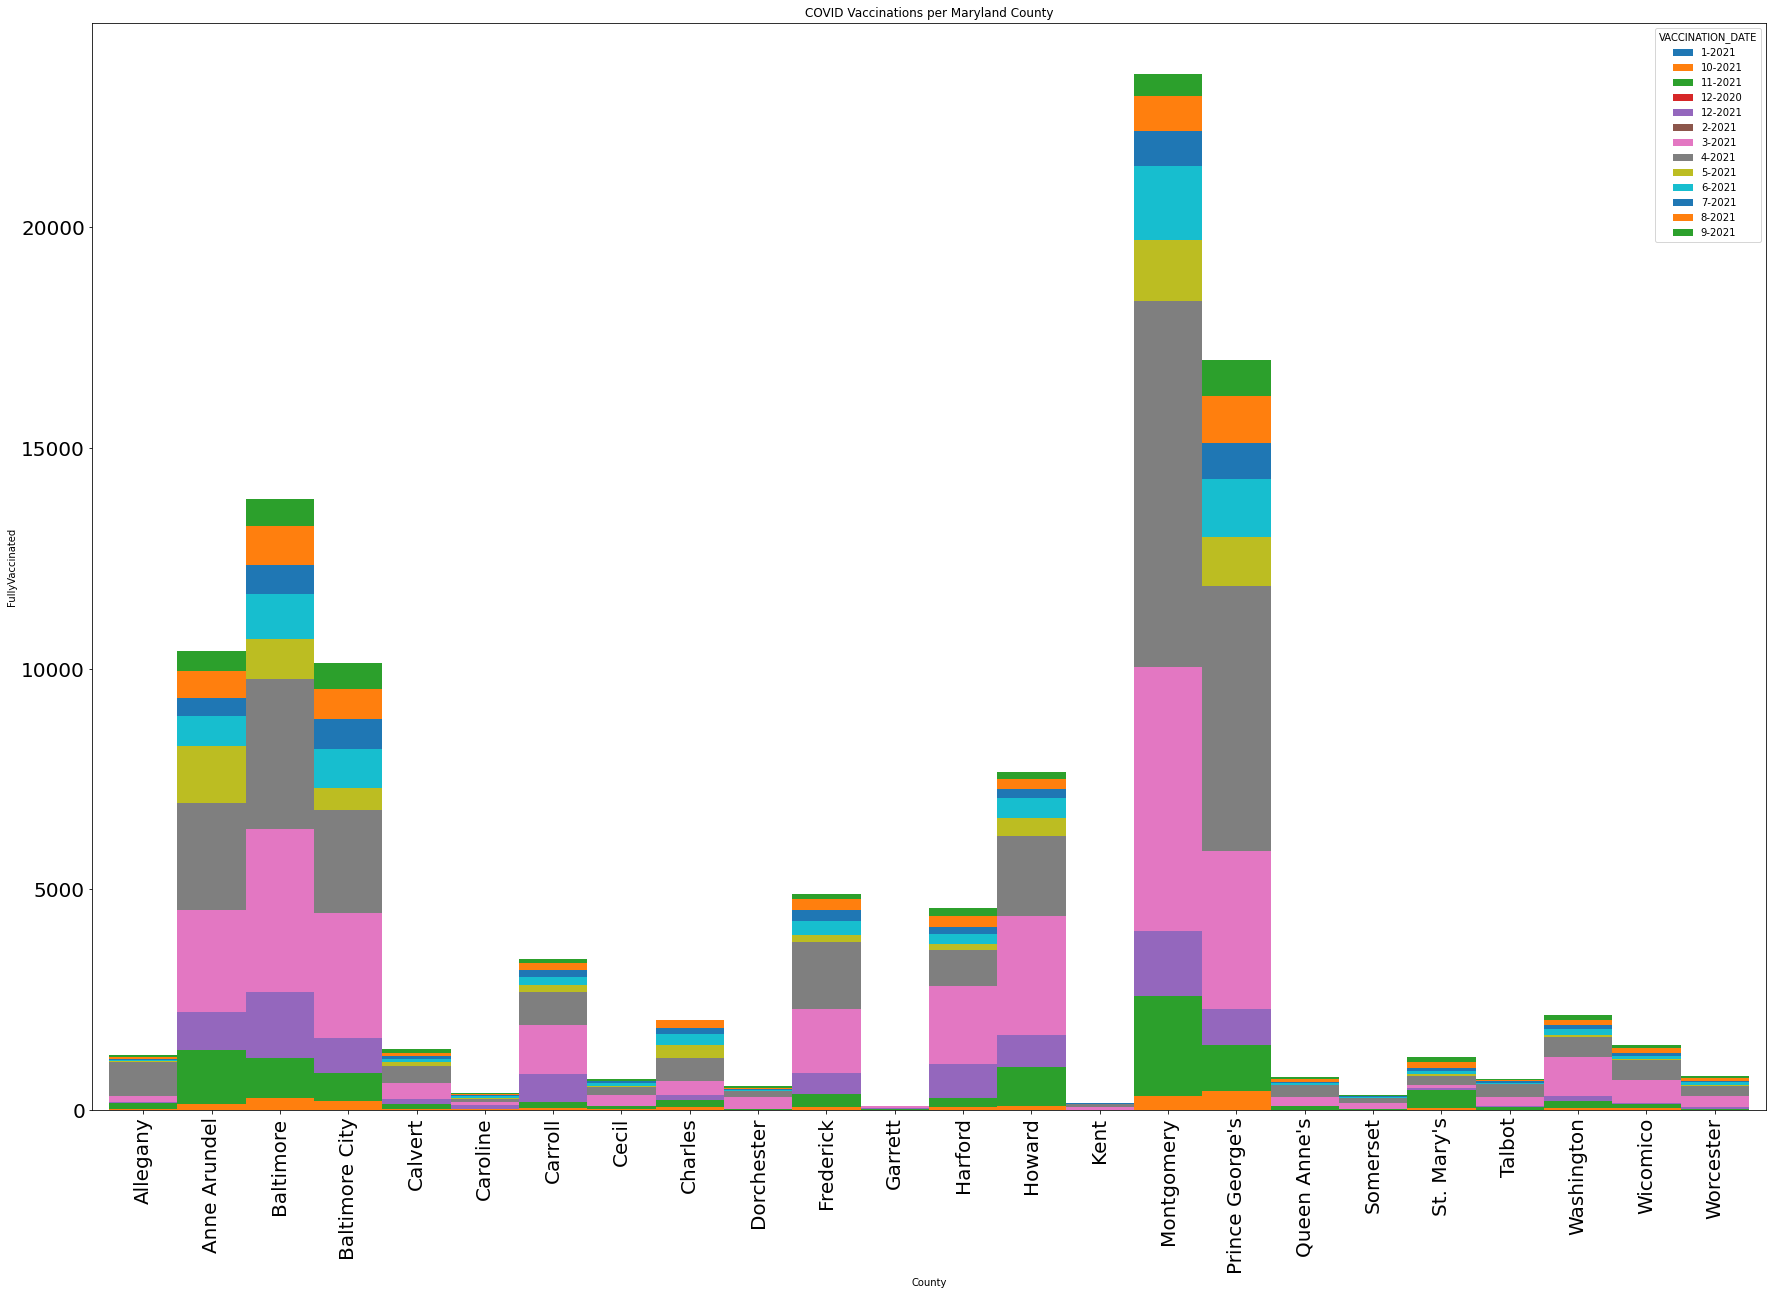

In [121]:
# Compare each counties fully vaccination count per month
plot = res.pivot(index = 'County', columns = 'VACCINATION_DATE', values='FullyVaccinated')
plot
plot.plot.bar(stacked = True, figsize = (30, 20), fontsize = 20, width = 1 , xlabel = ('County'), ylabel = ("FullyVaccinated"), 
                  title = ('COVID Vaccinations per Maryland County'))


Text(0, 0.5, 'Hospitalizations')

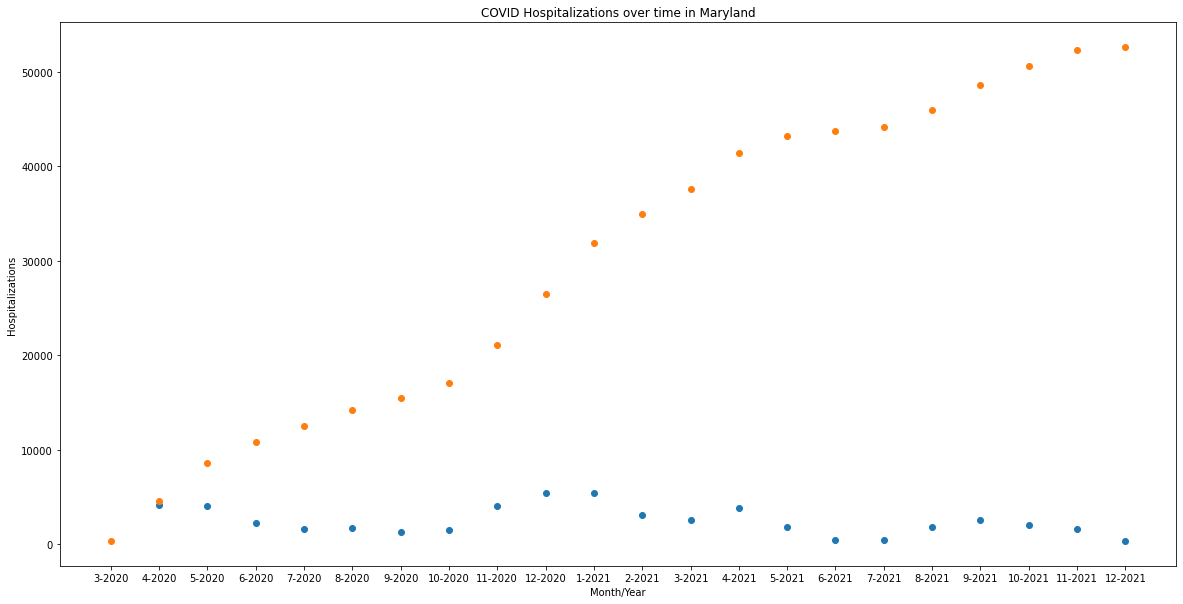

In [134]:
plt.figure(figsize=(20,10))
plt.scatter(hsp.index, hsp['increase'])
plt.scatter(hsp.index, hsp['Count'])

plt.title("COVID Hospitalizations over time in Maryland")
plt.xlabel("Month/Year")
plt.ylabel("Hospitalizations")

ideas

I have monthly and cumulative cases by county
I have montly and cumulative vaccinations by county

I have monthly and cumulative hospitializations by state


linear regression for hospitalizations and vaccinations to compare
look at trends in the 2020 holiday season Thanksgiving vs Christmas which is before and after covid vaccines

hypothesis testing
state cases increase in thanksgiving vs Christmas and vaccination rates for both
compare the counties with the highest cases and the highest vaccinations, are they the same counties or different?

## Analysis, Hypothesis Testing and Machine Learning:

make a hypothesis about something and use the data to show trends

## Insight and Policy Decisions

more prose on the explanation of data and conclusion